## Application des visualisations au corpus de référence !

In [6]:
!pip install -U pip setuptools wheel
!pip install -U spacy

import matplotlib.pyplot as plt
import spacy

from datasets import load_dataset

# On importe le corpus de référence.
dataset = load_dataset("rajpurkar/squad", split="train")
dataset = dataset.to_pandas()

nlp = spacy.load("en_core_web_sm")

<Axes: ylabel='Frequency'>

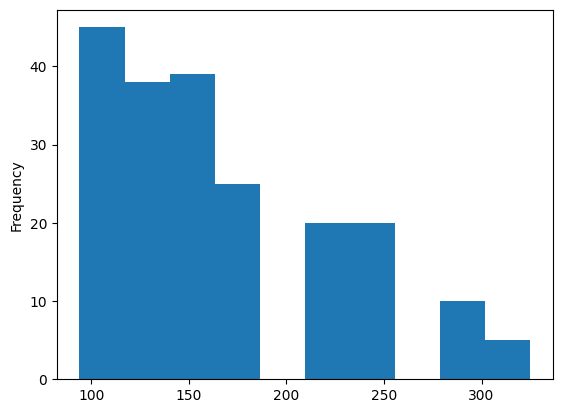

In [7]:
dataset["context_length"] = None
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.context)
    dataset.loc[i, "context_length"] = len(doc)
    if i > 200:
        break

dataset["context_length"].plot(kind="hist")

<Axes: ylabel='Frequency'>

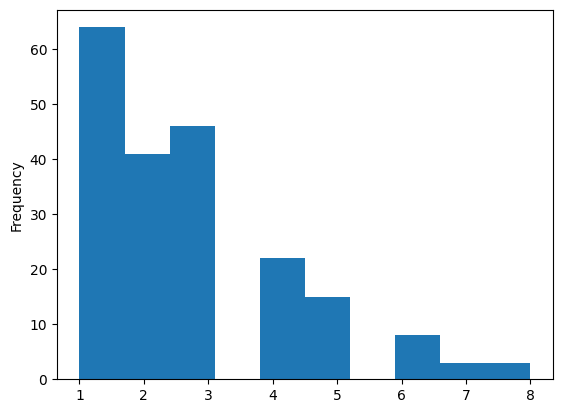

In [8]:
dataset["answer_length"] = None
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.answers["text"][0])
    dataset.loc[i, "answer_length"] = len(doc)
    if i > 200:
        break

dataset["answer_length"].plot(kind="hist")

<Axes: xlabel='context_length'>

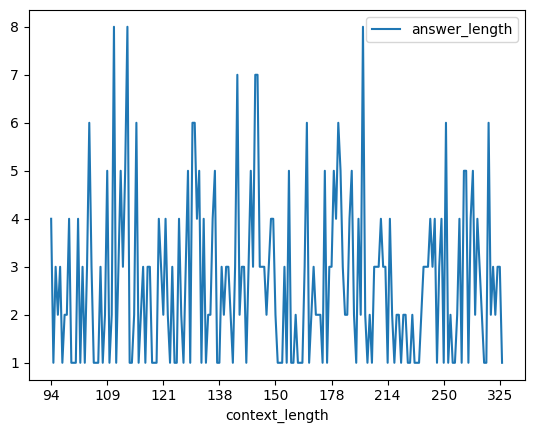

In [9]:
dataset.sort_values("context_length").plot("context_length", "answer_length")

## Loi de Zipf

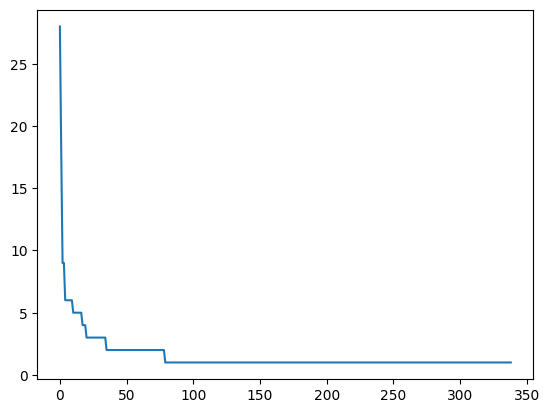

In [10]:
from collections import Counter

concat_context = []
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.answers["text"][0])
    for token in doc:
        concat_context.append(str(token))
    if i > 200:
        break

concat_context_counter = Counter(concat_context)
plt.plot(sorted(concat_context_counter.values(), reverse=True))

## On applique maintenant les mêmes visualisations à notre propre corpus !

In [4]:
import matplotlib.pyplot as plt
import spacy

from datasets import load_dataset

# On importe le corpus de référence.
dataset = load_dataset("csv", data_files="../data/clean/datas_chat.csv", split="train")
dataset = dataset.to_pandas()

# On importe cette fois le modèle pour le français.
nlp = spacy.load("fr_core_news_sm")

# On affiche notre dataset pour voir s'il est correctement formé.
dataset

,id,title,content,question,answer
0,1,capillarité,Cet article ne cite pas suffisamment ses sour...,Quelle force de tension se produit sur la capi...,"{'text': 'forces de tension superficielle', '..."
1,2,félidés,Félidés • Félins «Félin» redirige ici. Pour l...,Quel est le denier encêtre commun des félins m...,"{'text': 'Pseudaelurus', 'answer_start': 1238}"
2,3,sourire,"Pour les articles homonymes, voir Sourire (ho...",Que témoigne le sourire ?,"{'text': 'la sympathie', 'answer_start': 124}"
3,4,races,«Racial» redirige ici. Pour l’article homophon...,Que désigne le mot «race» ?,"{'text': ""des groupes d'une même espèce animal..."
4,5,toilette,"Pour les toiletteurs, voir Toiletteur . Le t...",Quand est apparue la tondeuse pour chien ?,"{'text': 'en 1850', 'answer_start': 648}"
5,6,clavicule,Certaines informations figurant dans cet artic...,Où se situe la clavicule ?,"{'text': 'la ceinture scapulaire', 'answer_st..."
6,7,poisson,"Pour les articles homonymes, voir Poisson (ho...",Quel est la répartition des poissons dans l'oc...,{'text': '50% des poissons vivraient dans 17% ...
7,8,papilles,"En biologie et en anatomie , une papille ...",De quoi est composé une pupille ?,"{'text': 'un tissu épithélial', 'answer_start'..."
8,9,animaux_de_compagnie,Un animal de compagnie est un animal recev...,Qu'est ce qui est attendu d'un animal de compa...,"{'text': 'sa présence, de sa beauté, de sa jov..."
9,10,miaulement,Le miaulement est une vocalisation émise pa...,Quel est l'onomatopée du miaulement en français ?,"{'text': 'miaou', 'answer_start': 127}"


<Axes: ylabel='Frequency'>

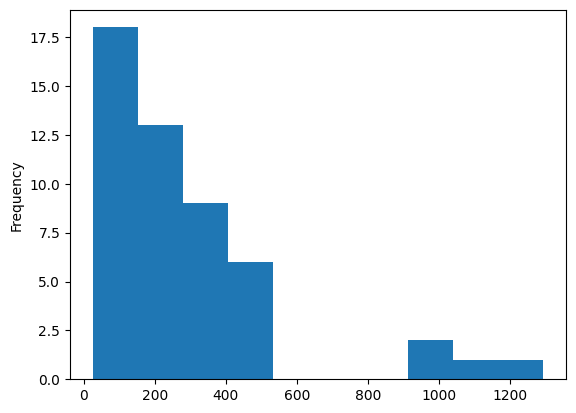

In [22]:
# On observe la répartition de la longueur des contextes.

dataset["context_length"] = None
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.content)
    dataset.loc[i, "context_length"] = len(doc)
    # Condition d'arrêt qui n'est pas très utile ici car notre corpus fait 50 lignes.
    if i > 200:
        break

dataset["context_length"].plot(kind="hist")

'\n    # On récupère le str de l\'element.\n    answer = element.answer\n    colonne_answer = fr"{answer}"\n    # On convertie en dictionnaire grace au module json.\n    dico_answer = json.loads(colonne_answer.replace("\'",\'"\').replace(",", ","))\n    # On récupère finalement ce qui nous intéresse dans cette colonne.\n    text_answer = dico_answer["text"]\n    print(dico_answer)\n\n    doc = nlp(text_answer)\n    dataset.loc[i, "answer_length"] = len(doc)\n    # Condition au cas où, mais pas utile car notre dataset fait 50 lignes.\n    if i>200:\n        break\n\ndataset["answer_length"].plot(kind="hist")\n'

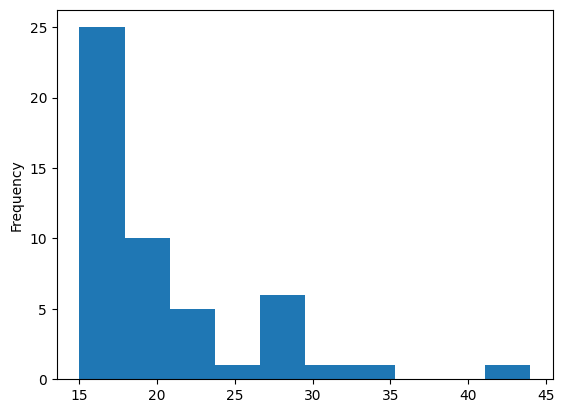

In [66]:
# On importe json pour convertir le contenu de notre colonne answer en dictionnaire Python.
import json

# On observe la répartition de la longueur des réponses.
dataset["answer_length"] = None
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.answer)
    dataset.loc[i, "answer_length"] = len(doc)
    # Condition au cas où, mais pas utile car notre dataset fait 50 lignes.
    if i > 200:
        break

dataset["answer_length"].plot(kind="hist")

# Manière de ne compter que la longueur de la réponse et pas l'entièreté du contenu de chaque ligne de la colonne answer.
# Ne fonctionne pas, donc on procède de la manière indiquée ci-dessus, qui reste inexacte.
# Ce graphique nous permet tout de même d'avoir un ordre de grandeur et une répartition.
"""
    # On récupère le str de l'element.
    answer = element.answer
    colonne_answer = fr"{answer}"
    # On convertie en dictionnaire grace au module json.
    dico_answer = json.loads(colonne_answer.replace("'",'"').replace(",", ","))
    # On récupère finalement ce qui nous intéresse dans cette colonne.
    text_answer = dico_answer["text"]
    print(dico_answer)

    doc = nlp(text_answer)
    dataset.loc[i, "answer_length"] = len(doc)
    # Condition au cas où, mais pas utile car notre dataset fait 50 lignes.
    if i>200:
        break

dataset["answer_length"].plot(kind="hist")
"""

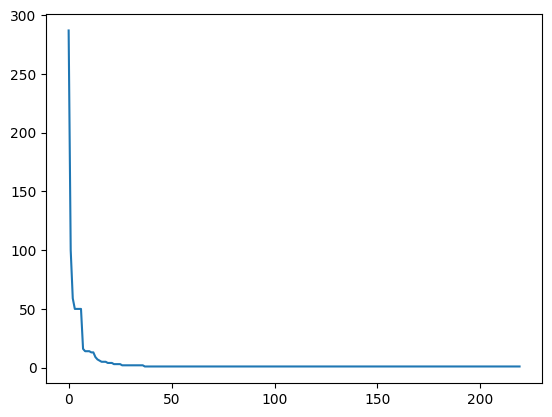

In [67]:
from collections import Counter

concat_context = []
# loi de Zipf sur l'ensemble des réponses du corpus :
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.answer)
    for token in doc:
        concat_context.append(str(token))
    if i > 200:
        break

concat_context_counter = Counter(concat_context)
plt.plot(sorted(concat_context_counter.values(), reverse=True))

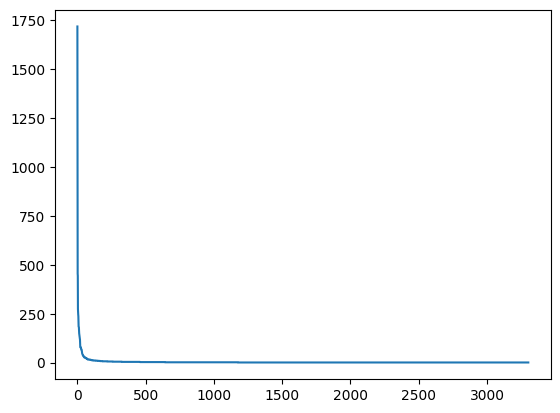

In [68]:
from collections import Counter

concat_context = []

# loi de Zipf sur l'ensemble des elements content du corpus :
for i, element in enumerate(dataset.itertuples()):
    doc = nlp(element.content)
    for token in doc:
        concat_context.append(str(token))
    if i > 200:
        break

concat_context_counter = Counter(concat_context)
plt.plot(sorted(concat_context_counter.values(), reverse=True))